In [ ]:
import os
!git clone https://github.com/Maria-Elisa-M/BW_prediction_keypoint.git

# Import libraries
**Always run the cell bellow**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from skimage.io import imread, imshow
from skimage import data, filters, measure, morphology
from skimage.measure import label, regionprops, regionprops_table
from matplotlib.colors import ListedColormap

def plot_ch_hist(ch_data, thres_low, thres_up, color_name):
  fig, axs = plt.subplots(figsize=(10, 5))
  axs.hist(ch_data, bins=256, range=[0, 256], facecolor= color_name)
  axs.set(title = f'{color_name} channel histogram', xlabel = 'Pixel value')
  axs.axvline(x = thres_low, color = 'black', linestyle='--')
  axs.axvline(x = thres_up, color = 'black', linestyle=':')
  return fig

# Find your project directory

In [ ]:
# this notebook directory
directory = '/content/BW_prediction_keypoint/ansci_344/image_files'
# ----------
print("Perfect!")

Perfect!


## Open Image 1

In this section we work with **example_image.png**


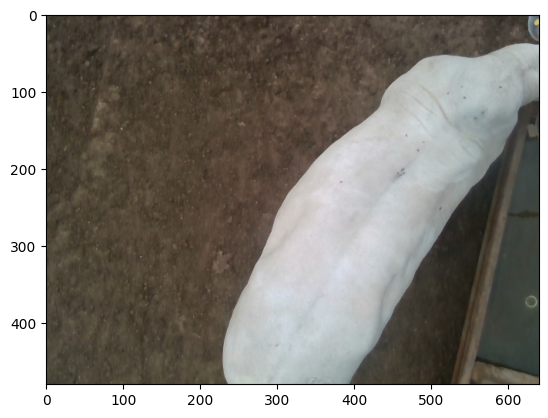

In [3]:
# put the name of the image you wan to read
image_filename1 = "example_image.png"
image_name = image_filename1.split(".")[0]
img_path = os.path.join(directory, image_filename1)
image = imread(img_path)
image1 = image.copy()
plt.imshow(image)

### Get image dimensions

In [4]:
image_size = image.shape
print(f"Dimension 1: {image_size[0]},\nDimension 2: {image_size[1]}, \nDimension 3: {image_size[2]}")

Dimension 1: 480,
Dimension 2: 640, 
Dimension 3: 3


### Image histogram for each RGB channel
1. Run the the histogam cells with the default theshold
2. Identify the best lower and upper bound for each channel
3. Modify the upper and lower thresholds for each channel

```
# ======== threshold ============
# ===============================
red_lower = 120
red_upper = 255
# ===============================
```
4. Run the histogram cells again
5. Repeat if you think you need to adjust the thresholds

In [5]:
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

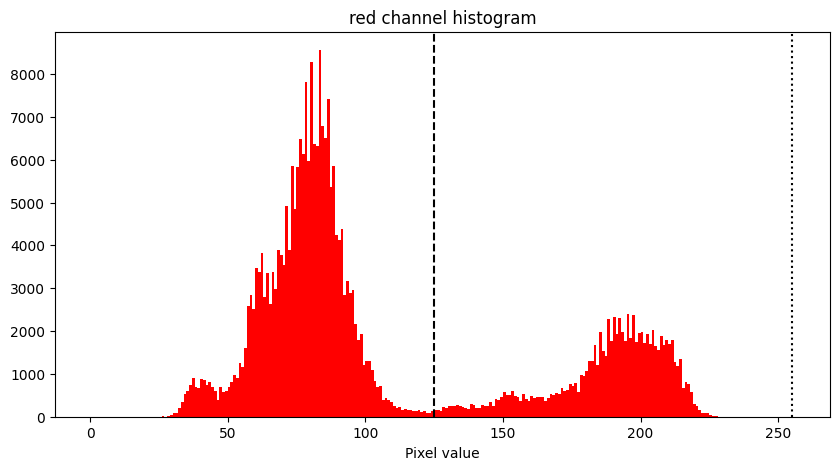

In [ ]:
# ======== threshold ============
# ===============================
red_lower = 125
red_upper = 255
# ===============================
color_name =  "red"
hist_plot = plot_ch_hist(red_channel.flatten(), red_lower, red_upper, color_name)


In [ ]:
# ======== threshold ============
# ===============================
green_lower = 125
green_upper = 255
# ===============================
color_name =  "green"
hist_plot = plot_ch_hist(green_channel.flatten(), green_lower,green_upper, color_name)


In [ ]:
# ======== threshold ============
# ===============================
blue_lower = 125
blue_upper = 255
# ===============================
color_name =  "blue"
hist_plot = plot_ch_hist(blue_channel.flatten(), blue_lower,blue_upper, color_name)


### Image segmentation

#### Segmentation based on thresholds

In [ ]:
#using all channels
mask1 = (red_channel >= red_lower) & (red_channel <= red_upper) & \
       (green_channel >= green_lower) & (green_channel <= green_upper) & \
       (blue_channel >= blue_lower) & (blue_channel <= blue_upper)
# Set to 0 all pixels that are outside the defined bounds
rc = red_channel.copy()
rc[np.invert(mask1)] = 0
gc = green_channel.copy()
gc[np.invert(mask1)] = 0
bc = blue_channel.copy()
bc[np.invert(mask1)] = 0

# Recombine separate color channels into a single, true color RGB image
segmented_image = np.stack((rc, gc, bc), axis=-1)

#### Visualizing the original and segmented images

In [ ]:
fig, axs = plt.subplots(nrows= 1, ncols = 3, figsize=(12, 5))
axs[0].imshow(image)
axs[0].set(title = 'RGB - Original image')
axs[0].axis('off')
axs[1].imshow(segmented_image)
axs[1].set(title = 'RGB - Segmented image')
axs[1].axis('off')
axs[2].imshow(mask1, cmap='gray')
axs[2].set(title = 'Binary mask')
axs[2].axis('off')
plt.tight_layout()



## Open image 2

In this section we work with **example_image2.png**


In [ ]:
# put the name of the image you wan to read
image_filename2 = "example_image2.png"
image_name = image_filename2.split(".")[0]
img_path = os.path.join(directory, image_filename2)
image = imread(img_path)
plt.imshow(image)

### Get image dimensions

In [ ]:
image_size = image.shape
print(f"Dimension 1: {image_size[0]},\nDimension 2: {image_size[1]}, \nDimension 3: {image_size[2]}")

### Image histogram for each RGB channel
1. Run the the histogam cells with the default theshold
2. Identify the best lower and upper bound for each channel
3. Modify the upper and lower thresholds for each channel

```
# ======== threshold ============
# ===============================
red_lower = 120
red_upper = 255
# ===============================
```
4. Run the histogram cells again
5. Repeat if you think you need to adjust the thresholds

In [ ]:

red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

In [ ]:
# ======== threshold ============
# ===============================
red_lower = 125
red_upper = 255
# ===============================
color_name =  "red"
hist_plot = plot_ch_hist(red_channel.flatten(), red_lower, red_upper, color_name)


In [ ]:
# ======== threshold ============
# ===============================
green_lower = 125
green_upper = 255
# ===============================
color_name =  "green"
hist_plot = plot_ch_hist(green_channel.flatten(), green_lower,green_upper, color_name)


In [ ]:
# ======== threshold ============
# ===============================
blue_lower = 125
blue_upper = 255
# ===============================
color_name =  "blue"
hist_plot = plot_ch_hist(blue_channel.flatten(), blue_lower,blue_upper, color_name)


In [ ]:
#using all channels
mask2 = (red_channel >= red_lower) & (red_channel <= red_upper) & \
       (green_channel >= green_lower) & (green_channel <= green_upper) & \
       (blue_channel >= blue_lower) & (blue_channel <= blue_upper)
# Set to 0 all pixels that are outside the defined bounds
rc = red_channel.copy()
rc[np.invert(mask2)] = 0
gc = green_channel.copy()
gc[np.invert(mask2)] = 0
bc = blue_channel.copy()
bc[np.invert(mask2)] = 0
# Recombine separate color channels into a single, true color RGB image
segmented_image = np.stack((rc, gc, bc), axis=-1)

In [ ]:
fig, axs = plt.subplots(nrows= 1, ncols = 3, figsize=(12, 5))
axs[0].imshow(image)
axs[0].set(title = 'RGB - Original image')
axs[0].axis('off')
axs[1].imshow(segmented_image)
axs[1].set(title = 'RGB - Segmented image')
axs[1].axis('off')
axs[2].imshow(mask2, cmap='gray')
axs[2].set(title = 'Binary mask')
axs[2].axis('off')
plt.tight_layout()

# Feature extraction
Extracting features from **example_image.png**

In [ ]:
feature_list = ['centroid','perimeter','area', 'eccentricity', 'orientation', 'axis_major_length', 'axis_minor_length']
binaryImage = mask1
label_image = label(binaryImage)
props = regionprops_table(label_image, properties=('centroid','area'))
props1 = pd.DataFrame(props)
area_list = props1.area
# remove small objects
area_thres = np.max(area_list)-1
binaryImage2 = morphology.remove_small_objects(binaryImage, area_thres)
label_image = label(binaryImage2)
props = regionprops_table(label_image, properties=(feature_list))
props2 = pd.DataFrame(props)
props2

## Show features on image



In [ ]:
image_name = image_filename1.split(".")[0]
xc = props2.loc[0,"centroid-0"]
yc = props2.loc[0,"centroid-1"]
perimc = props2.loc[0,"perimeter"]
areac = props2.loc[0,"area"]
ecc =  props2.loc[0,"eccentricity"]
strlabel = f"centroid: ({xc:.0f}, {yc:.0f})\nperimeter: {perimc:.0f}\narea:{areac:.0f}\neccentricity: {ecc:.0f}"
mask_clean = binaryImage2.copy()

cmp=ListedColormap(['black','blue'])
fig, axs = plt.subplots(figsize=(8, 10))
axs.imshow(image1, alpha= 0.3, cmap = cmp)
axs.imshow(mask_clean, alpha= 0.2, cmap = cmp)
axs.axis('off')
# add centroid and annotations
axs.annotate(strlabel,
      xy=(xc, yc), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.8),
      arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


# Bodyweight estimation with image features
In this section, we will use the binary masks of the images from 10 weaned Holstein calves. The images were taken with a fixed camera over the pen. We will also use a file that contains the calves' weights, recorded in the same week as the images.

In [ ]:
# read calf binary images
calf_path = os.path.join(directory, "binary_calf")
file_list = os.listdir(calf_path)
calf_images = {}
for file in file_list:
  file_path = os.path.join(calf_path, file)
  keyw = file.split("_")[0]
  calf_images[keyw] = imread(file_path)


# show the calf binary images
fig, axs = plt.subplots(nrows= 2, ncols = 5, figsize=(16, 8))
for num, img in enumerate(calf_images.items()):
  i = num//5
  j = num%5
  axs[i,j].imshow(img[1], cmap='gray')
  axs[i,j].set(title = f"calf ID: {img[0]}")
  axs[i,j].axis('off')
plt.tight_layout()

# read calf body weight
dtat_df = pd.read_csv(os.path.join(directory, "calf_weights.csv"))



## Feature extraction

In [ ]:
props_list = ['perimeter','area', 'eccentricity', 'orientation', 'axis_major_length', 'axis_minor_length']
features_df = pd.DataFrame(index = range(len(file_list)), columns=['calf', 'centroid-0', 'centroid-1'] + props_list)
# get the area and perimeter for each calf
for num, img in enumerate(calf_images.items()):
  label_image = label(img[1])
  temp = pd.DataFrame(regionprops_table(label_image, properties=(["centroid"] + props_list)))
  temp.sort_values(by = ["area"], inplace=True, ascending=False, ignore_index = True)
  features_df.loc[num, ['centroid-0', 'centroid-1']+ props_list]= temp.loc[0]
  features_df.loc[num, "calf"] = int(img[0])
# merge bodiweight with features
merged_df = features_df.merge(dtat_df, on = "calf")
merged_df

## Regression

In [ ]:
# Regreesion
feature= "area"
intercept = np.ones(len(merged_df))
XX = np.stack((intercept , merged_df.area.to_numpy()), axis=-1).astype(float)
Y = merged_df.weight.to_numpy().astype(float)
beta = np.linalg.inv(np.transpose(XX)@XX)@np.transpose(XX)@Y
Ypred = XX@beta
# Regression coefficient
ssr = np.sum((Ypred-Y)**2)
sst = np.sum((Y-np.mean(Y))**2)
Rsq = 1- ssr/sst
# Plot
fig, axs = plt.subplots( figsize=(8, 6))
axs.scatter(merged_df.area, merged_df.weight)
axs.plot(merged_df.area, Ypred)
axs.set(title = f"Bodyweight vs. {feature}", xlabel = f"{feature} (px)", ylabel = "bodyweight (lb)")
axs.text(0.1, 0.9, f"r-squared = {Rsq:.3f}", size=14, transform=axs.transAxes)

In [ ]:
# Regreesion
feature= "perimeter"
intercept = np.ones(len(merged_df))
XX = np.stack((intercept , merged_df.perimeter.to_numpy()), axis=-1).astype(float)
Y = merged_df.weight.to_numpy().astype(float)
beta = np.linalg.inv(np.transpose(XX)@XX)@np.transpose(XX)@Y
Ypred = XX@beta
# Regression coefficient
ssr = np.sum((Ypred-Y)**2)
sst = np.sum((Y-np.mean(Y))**2)
Rsq = 1- ssr/sst
# Plot
fig, axs = plt.subplots( figsize=(8, 6))
axs.scatter(merged_df.perimeter, merged_df.weight)
axs.plot(merged_df.perimeter, Ypred)
axs.set(title = f"Bodyweight vs. {feature}", xlabel = f"{feature} (px)", ylabel = "bodyweight (lb)")
axs.text(0.1, 0.9, f"r-squared = {Rsq:.3f}", size=14, transform=axs.transAxes)

In [ ]:
# Regreesion
feature = "axis minor length"
intercept = np.ones(len(merged_df))
XX = np.stack((intercept , merged_df.axis_minor_length.to_numpy()), axis=-1).astype(float)
Y = merged_df.weight.to_numpy().astype(float)
beta = np.linalg.inv(np.transpose(XX)@XX)@np.transpose(XX)@Y
Ypred = XX@beta
# Regression coefficient
ssr = np.sum((Ypred-Y)**2)
sst = np.sum((Y-np.mean(Y))**2)
Rsq = 1- ssr/sst
# Plot
fig, axs = plt.subplots( figsize=(8, 6))
axs.scatter(merged_df.axis_minor_length, merged_df.weight)
axs.plot(merged_df.axis_minor_length, Ypred)
axs.set(title = f"Bodyweight vs. {feature}", xlabel = f"{feature} (px)", ylabel = "bodyweight (lb)")
axs.text(0.1, 0.9, f"r-squared = {Rsq:.3f}", size=14, transform=axs.transAxes)


In [ ]:
# Regreesion
feature = "axis major length"
intercept = np.ones(len(merged_df))
XX = np.stack((intercept , merged_df.axis_major_length.to_numpy()), axis=-1).astype(float)
Y = merged_df.weight.to_numpy().astype(float)
beta = np.linalg.inv(np.transpose(XX)@XX)@np.transpose(XX)@Y
Ypred = XX@beta
# Regression coefficient
ssr = np.sum((Ypred-Y)**2)
sst = np.sum((Y-np.mean(Y))**2)
Rsq = 1- ssr/sst
# Plot
fig, axs = plt.subplots( figsize=(8, 6))
axs.scatter(merged_df.axis_major_length, merged_df.weight)
axs.plot(merged_df.axis_major_length, Ypred)
axs.set(title = f"Bodyweight vs. {feature}", xlabel = f"{feature} (px)", ylabel = "bodyweight (lb)")
axs.text(0.1, 0.9, f"r-squared = {Rsq:.3f}", size=14, transform=axs.transAxes)